In [ ]:
### This cell imports data

import pandas as pd
import pandas_datareader.data as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Eur/AUD data; 
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
EURAUD =  web.DataReader('EURAUD=X', 'yahoo', start, end)
 
type(AUDGBP)

In [3]:
EURAUD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,1.501685,1.492336,1.493284,1.500908,1.500908,NaN
2016-01-01,1.493338,1.493338,1.494425,1.493338,1.493338,NaN
2016-01-04,1.489856,1.507437,1.500915,1.489493,1.489493,NaN
2016-01-05,1.507091,1.501502,1.502244,1.506762,1.506762,NaN
2016-01-06,1.501301,1.519093,1.501729,1.501086,1.501086,NaN


In [6]:
#clean up sum of the data and we will concaternate Close 
Close = EURAUD[['Close']]

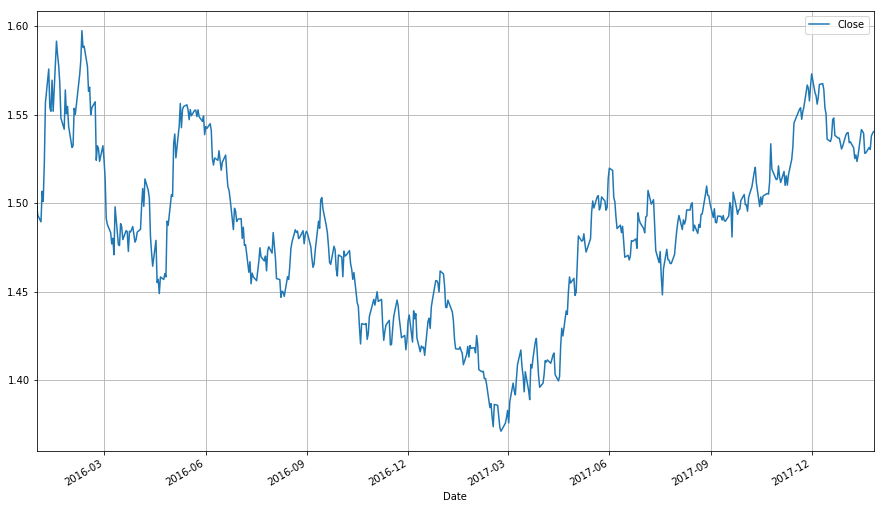

In [32]:
# We will plot our data
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 
#open graph in Jupyter note book
# %pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Close.plot(grid =True)

In [33]:
#Creating some indicators

ma = EURAUD["20d"] = np.round(EURAUD["Close"].rolling(window = 20, center = False).mean(), 2)
ma.name = "20 Moving Average"
ma

Date
2015-12-31     NaN
2016-01-01     NaN
2016-01-04     NaN
2016-01-05     NaN
2016-01-06     NaN
2016-01-07     NaN
2016-01-08     NaN
2016-01-11     NaN
2016-01-12     NaN
2016-01-13     NaN
2016-01-14     NaN
2016-01-15     NaN
2016-01-18     NaN
2016-01-19     NaN
2016-01-20     NaN
2016-01-21     NaN
2016-01-22     NaN
2016-01-25     NaN
2016-01-26     NaN
2016-01-27    1.54
2016-01-28    1.55
2016-01-29    1.55
2016-02-01    1.55
2016-02-02    1.55
2016-02-03    1.56
2016-02-04    1.56
2016-02-05    1.56
2016-02-08    1.56
2016-02-09    1.56
2016-02-10    1.56
              ... 
2017-12-18    1.56
2017-12-19    1.56
2017-12-20    1.56
2017-12-21    1.56
2017-12-22    1.56
2017-12-25    1.55
2017-12-26    1.55
2017-12-27    1.55
2017-12-28    1.55
2017-12-29    1.55
2018-01-01    1.55
2018-01-02    1.55
2018-01-03    1.54
2018-01-04    1.54
2018-01-05    1.54
2018-01-08    1.54
2018-01-09    1.54
2018-01-10    1.54
2018-01-11    1.54
2018-01-12    1.53
2018-01-15    1.54
2018-01

In [37]:
# Concatenate Data
Data = pd.concat([Close,ma],axis = 1)
Data.isnull() #tells us which values are missing


,Close,20 Moving Average
Date,,
2015-12-31,False,True
2016-01-01,False,True
2016-01-04,False,True
2016-01-05,False,True
2016-01-06,False,True
2016-01-07,False,True
2016-01-08,False,True
2016-01-11,False,True
2016-01-12,False,True


In [137]:
#drop missing values
Data_Cleaned = Data.dropna()



1.5404930000000001

In [162]:
G = np.zeros(len(Data_Cleaned) - 1);
for i in np.arange(len(Data_Cleaned)-1):
    if Data_Cleaned.loc[Data_Cleaned.index[i],'Close'] > Data_Cleaned.loc[Data_Cleaned.index[i + 1],'Close']:
        G[i]= 1
    else:
        G[i]= 0
G    

    

array([ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1

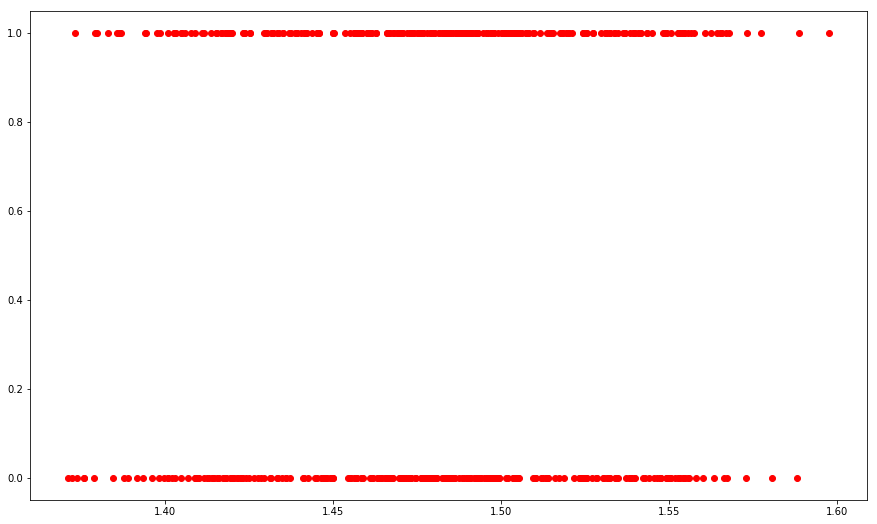

In [173]:
Close_Cleaned = Data_Cleaned[['Close']]
#Close_Cleaned.drop(end)
plot(Close_Cleaned.drop(end),G,'ro')

519